In [1]:
import warnings

warnings.filterwarnings("ignore")

In [2]:
from prophet import Prophet
import pandas as pd

Importing plotly failed. Interactive plots will not work.


In [3]:
df = pd.read_csv('Monthly_CPI_data_w_percent_change.csv', index_col = 0)

In [4]:
food = df.reset_index()
food = food.loc[~df.index.str.contains("Percent Change"), ["Food", "index"]] #isolating food category
food["index"] = pd.to_datetime(food["index"]) #convert dates to datetime objects
food.rename(columns={"Food":"y", "index":"ds"}, inplace = True)  #rename columns to be compatible with the model
food

,y,ds
0,232.666,2012-01-01
1,232.486,2012-02-01
2,232.792,2012-03-01
3,233.234,2012-04-01
4,233.339,2012-05-01
...,...,...
133,279.135,2021-08-01
134,281.506,2021-09-01
135,284.205,2021-10-01
136,285.507,2021-11-01


In [5]:
m = Prophet()
model = m.fit(food)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [6]:
future = m.make_future_dataframe(periods=350)
food_model = m.predict(future)
food_model

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2012-01-01,232.340646,231.073615,233.605140,232.340646,232.340646,-0.005062,-0.005062,-0.005062,-0.005062,-0.005062,-0.005062,0.0,0.0,0.0,232.335584
1,2012-02-01,232.615770,231.293176,233.949501,232.615770,232.615770,0.009526,0.009526,0.009526,0.009526,0.009526,0.009526,0.0,0.0,0.0,232.625297
2,2012-03-01,232.873145,231.056685,233.773247,232.873145,232.873145,-0.546789,-0.546789,-0.546789,-0.546789,-0.546789,-0.546789,0.0,0.0,0.0,232.326356
3,2012-04-01,233.148270,232.041285,234.657359,233.148270,233.148270,0.316587,0.316587,0.316587,0.316587,0.316587,0.316587,0.0,0.0,0.0,233.464857
4,2012-05-01,233.414519,232.297249,234.966431,233.414519,233.414519,0.158624,0.158624,0.158624,0.158624,0.158624,0.158624,0.0,0.0,0.0,233.573144
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
465,2022-11-12,294.158327,292.417299,295.846848,293.115327,295.411374,-0.125722,-0.125722,-0.125722,-0.125722,-0.125722,-0.125722,0.0,0.0,0.0,294.032605
466,2022-11-13,294.189444,292.060558,295.555869,293.141925,295.449667,-0.428564,-0.428564,-0.428564,-0.428564,-0.428564,-0.428564,0.0,0.0,0.0,293.760880
467,2022-11-14,294.220562,291.836043,295.261242,293.168523,295.480462,-0.758163,-0.758163,-0.758163,-0.758163,-0.758163,-0.758163,0.0,0.0,0.0,293.462399
468,2022-11-15,294.251679,291.525366,294.960086,293.195121,295.515024,-1.102916,-1.102916,-1.102916,-1.102916,-1.102916,-1.102916,0.0,0.0,0.0,293.148763


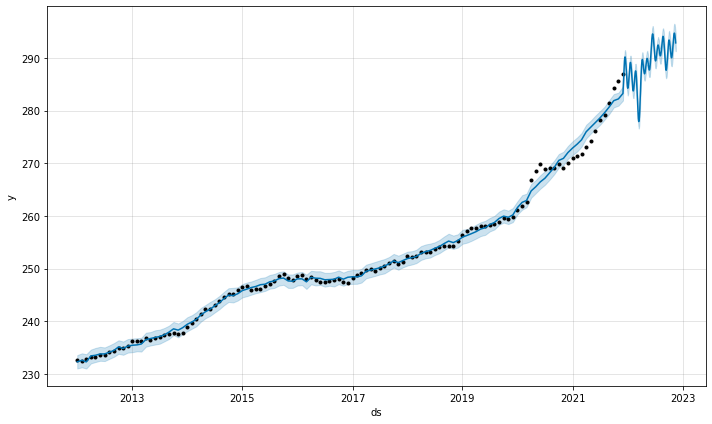

In [7]:
food_modelplot = m.plot(food_model)

__This was actually very interesting! The model did a great job at finding the trend and was not fazed by the fact that it wasn't stationary. I'm not really sure what's going on with the end part though. I will later try a category that has more erratic changes to see how the model works with that__

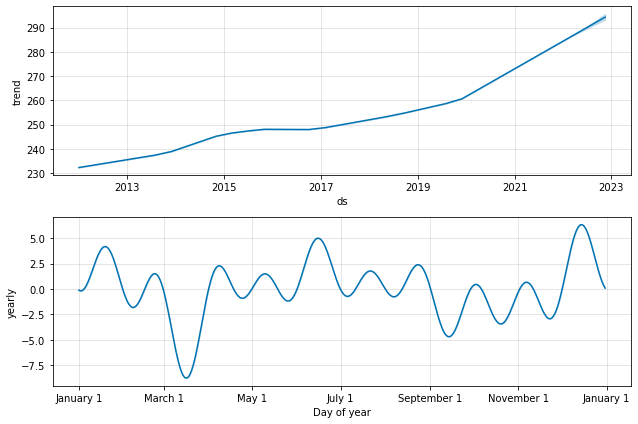

In [8]:
food_trendplots = m.plot_components(food_model)

__These show the trends of the data. The second plot shows the yearly seasonality. So it seems like the CPI of food is lower in April? Not sure what that's about, but I'm planning to look into it! Okay, now onto energy!__

In [9]:
energy = df.reset_index()
energy = energy.loc[~df.index.str.contains("Percent Change"), ["Energy", "index"]] #isolating energy category
energy["index"] = pd.to_datetime(energy["index"]) #convert dates to datetime objects
energy.rename(columns={"Energy":"y", "index":"ds"}, inplace = True)  #rename columns to be compatible with the model
energy

,y,ds
0,236.942,2012-01-01
1,242.663,2012-02-01
2,253.599,2012-03-01
3,255.736,2012-04-01
4,250.306,2012-05-01
...,...,...
133,246.639,2021-08-01
134,248.228,2021-09-01
135,255.338,2021-10-01
136,259.100,2021-11-01


In [10]:
m = Prophet()
model = m.fit(energy)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [11]:
future = m.make_future_dataframe(periods = 350)
energy_model = m.predict(future)

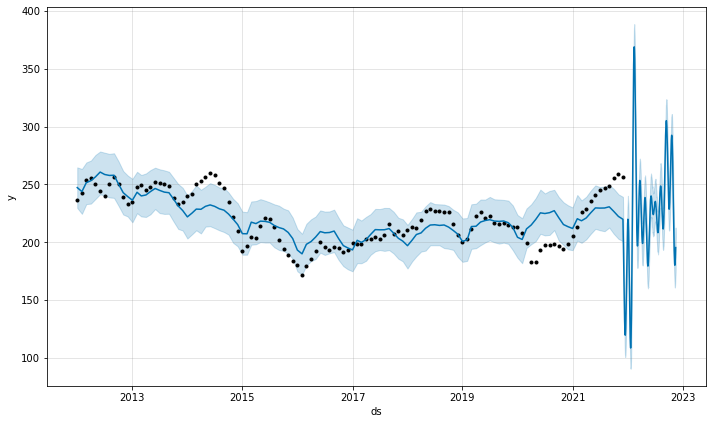

In [12]:
energy_modelplot = m.plot(energy_model)

__Hmmm...I'm not quite sure what's happening at the end there. The model does a good job with fitting the data but it's a bit funky when it comes to the future.__

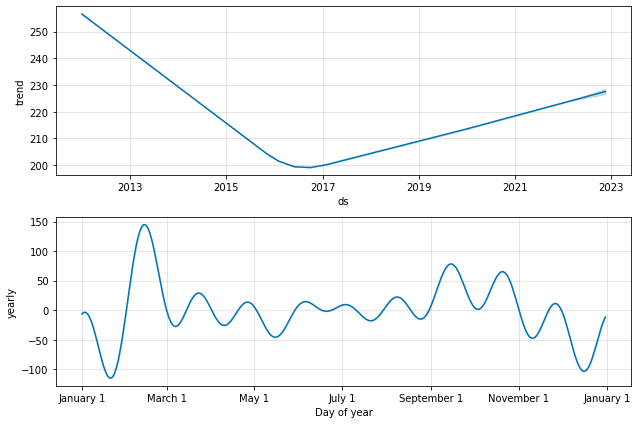

In [13]:
energy_trendplots = m.plot_components(energy_model)

__The second trend plot shows that the CPI for energy is greatest around late-feb/early-march. I now want to try using different seasonalities. I used the default yearly seasonality before, now I will try monthly!__

In [14]:
m = Prophet()
model = m.fit(energy)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [15]:
future = m.make_future_dataframe(periods = 24, freq = "m")
energy_model = m.predict(future)

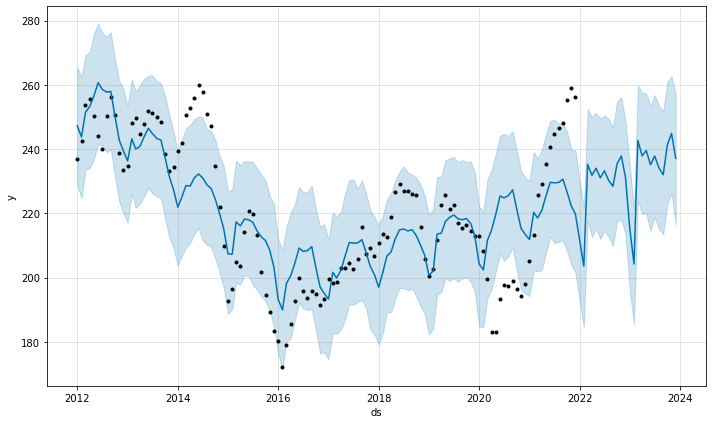

In [16]:
energy_modelplot = m.plot(energy_model)

__This is interesting. While it isn't as perfect as a fit, it does seem to generally follow the trend of the data. The last part also seems much more reasonable.__